In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
plt.gray()

import numpy as np

2022-10-15 14:22:48.884339: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


<Figure size 432x288 with 0 Axes>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

X,Y = (x_train, y_train), (x_test, y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

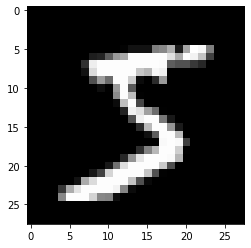

In [5]:
plt.imshow(x_train[0])
plt.show()

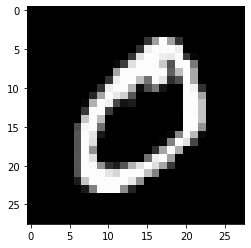

In [6]:
plt.imshow(x_train[1])
plt.show()

In [7]:
print(y_train[0], y_train[1])

5 0


In [8]:
c1 = 5
c2 = 0

In [9]:
# отфильтровать массивы датасета так, чтобы остались только 5-ки и 0-и

def myfilter(y):
    return (y == c1) + (y == c2)

filt_index_train = myfilter(y_train)
filt_index_test = myfilter(y_test)

x_train = x_train[filt_index_train]
y_train = y_train[filt_index_train]

x_test = x_test[filt_index_test]
y_test = y_test[filt_index_test]

In [10]:
x_train.shape

(11344, 28, 28)

In [11]:
y_train.shape

(11344,)

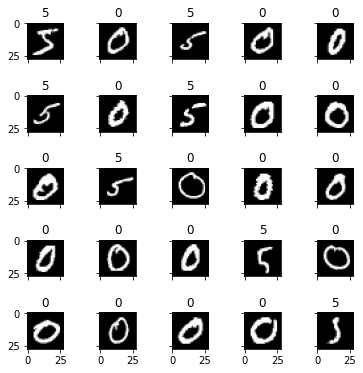

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

for ax, im, y in zip(grid, x_train, y_train):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(y)

plt.show()

In [13]:
n_train, h, w = x_train.shape
n_test, _, _ = x_test.shape

x_train = np.reshape(x_train, [n_train, h*w])
x_test = np.reshape(x_test, [n_test, h*w])

In [14]:
x_train.shape

(11344, 784)

In [15]:
x_test.shape

(1872, 784)

In [16]:
y_train = (y_train == c1).astype(np.int32)

In [17]:
y_test = (y_test == c1).astype(np.int32)

In [18]:
print(y_train[:10])

[1 0 1 0 0 1 0 1 0 0]


In [20]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

(array([980., 892.]),
 array([0. , 0.5, 1. ], dtype=float32),
 <BarContainer object of 2 artists>)

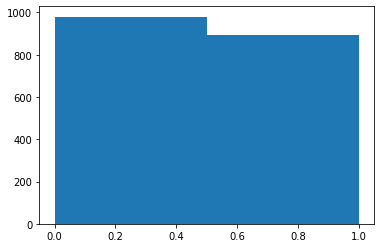

In [35]:
plt.hist(y_test, bins=2)

In [25]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd_2d_logistic_regresion(X, y, n_epochs = 5, eta = 0.01):
    m = X.shape[0]
    theta_path = []
    theta = np.random.randn(X.shape[1],1)*5
    grads_hist = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        for i in range(m):
            #random_index = np.random.randint(m)
            xi = X[shuffled_indices[i]: shuffled_indices[i]+1]
            yi = y[shuffled_indices[i]: shuffled_indices[i]+1]
            grads = xi.T.dot(sigmoid(xi.dot(theta)) - yi)
            theta = theta - eta * grads

        theta_path.append(theta)
        grads_hist.append(grads)
  
    return theta, np.array(theta_path), np.array(grads_hist)

In [27]:
theta, _, _ = sgd_2d_logistic_regresion(x_train, y_train, n_epochs = 1000, eta = 0.001)

In [28]:
theta.shape

(784, 1)

In [29]:
pred = sigmoid(np.matmul(x_test,theta)) > 0.5
correct = pred[:,0]==y_test

In [31]:
print(np.mean(correct))

0.9877136752136753


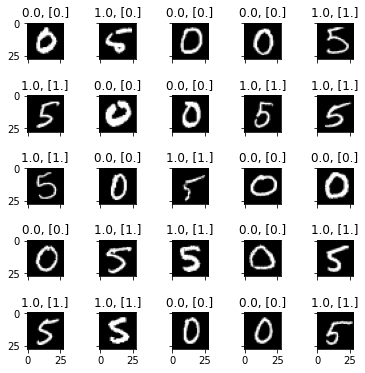

In [42]:
fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

for ax, im, y, p in zip(grid, x_test, y_test, pred):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.reshape([h,w]))
    #print(y.dtype)
    ax.set_title(str(y)+', '+str(p.astype(np.float32)))

plt.show()